Soft-DTW k-means
149.600 --> 159.944 --> 160.847 --> 161.164 --> 161.300 --> 
Done clustering
Cluster centres saved to file
Output saved to file
Displaying clusters


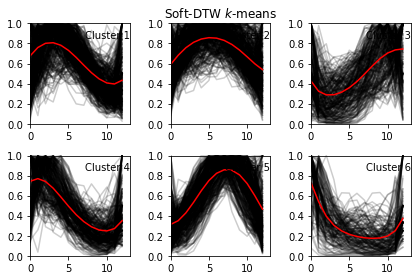

In [8]:
import numpy
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import csv
import random

from tslearn import metrics
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

papers = []
timeSeriesDataset = []
maxSelect = 10000

with open('resampledNormData.csv', mode='r') as dataFile:
    index = 0
    csvFile = csv.reader(dataFile)
    count = 0
    for line in csvFile:
        # md = [line[0], line[1]]
        # papers.append(md)

        thisPaper = [float(freq) for freq in line[2:]].copy()
        timeSeriesDataset.append(thisPaper.copy())

        thisPaper.insert(0, line[1])
        thisPaper.insert(0, line[0])
        papers.append(thisPaper)

        count += 1
        if count>maxSelect:
            break


seed = 0
numpy.random.seed(seed)

X_train = to_time_series_dataset(timeSeriesDataset)

sz = X_train.shape[1]


##############################
numberOfClusters = 6
##############################


plt.figure()
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=numberOfClusters,
                           metric="softdtw",
                           metric_params={"gamma": .5},
                           verbose=True,
                           random_state=seed,
                           max_iters = 5,
                           n_jobs=3)
y_pred = sdtw_km.fit_predict(X_train)

print("Done clustering")


# Save Cluster Centres to file : 
clusterCenters = []
for i in range(0, numberOfClusters):
    clusterCenters.append(sdtw_km.cluster_centers_[i].ravel())

with open('clusterCenters.csv', 'w', newline='') as f: 
        write = csv.writer(f) 
        write.writerows(clusterCenters) 

print("Cluster centres saved to file")

# Save Output to file : 
for i in range(0, len(papers)):
    papers[i].insert(0, y_pred[i])

with open('output.csv', 'w', newline='') as f: 
        write = csv.writer(f) 
        write.writerows(papers) 

print("Output saved to file")


# Plotting curves
curveDisplayRate = 0.2
print("Displaying clusters")
for yi in range(numberOfClusters):
    if (round(yi/3) <1): 
        plt.subplot(2, 3, 1 + yi)
        for xx in X_train[y_pred == yi]:
            if(random.random()<curveDisplayRate):
                plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
        plt.xlim(0, sz)
        plt.ylim(0, 1)
        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                transform=plt.gca().transAxes)
        if yi == 1:
            plt.title("Soft-DTW $k$-means")
    else:
        plt.subplot(2, 3, 1 + yi)
        for xx in X_train[y_pred == yi]:
            if(random.random()<curveDisplayRate):
                plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
        plt.xlim(0, sz)
        plt.ylim(0, 1)
        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                transform=plt.gca().transAxes)
        if yi == 1:
            plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

In [10]:
nsamples, nx, ny = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx*ny))

In [11]:
silhouette_score(d2_train_dataset, sdtw_km.labels_)

0.167749453828218